In [3]:
!pip3 install pm4py

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.9 MB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 27.1 MB/s eta 0:00:01
     |████████████████████████████████| 8.1 MB 23.8 MB/s eta 0:00:01
     |████████████████████████████████| 11.1 MB 783 kB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 21.5 MB/s eta 0:00:01
     |████████████████████████████████| 278 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 25.5 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 244 kB 19.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 8.5 MB/s  eta 0:00:01
     |████████████████████████████████| 103 kB 21.2 MB/s eta 0:00:01
     |█████████████████████

# - Impoting PM4PY Library

In [4]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer

In [5]:
# load .xes file
log = xes_importer.apply("../BPI_Challenge_2019.xes")

/Users/ali/Library/Python/3.9/lib/python/site-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
/Users/ali/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 251734/251734 [00:40<00:00, 6163.77it/s]


# - Looking into LOG
  + dimensoins : -number of cases -number of events -number of distinc activities

In [6]:
# Print dimensions of the dataset
num_cases = len(log)
num_events = sum(len(trace) for trace in log)
print("Number of Cases:", num_cases)
print("Number of Events:", num_events)

Number of Cases: 251734
Number of Events: 1595923


In [7]:
# Create a set to store unique event classes
event_classes = set()

# Iterate through the event log data to extract event classes
for trace in log:
    for event in trace:
        event_classes.add(event["concept:name"])

# Get the number of unique event classes
num_event_classes = len(event_classes)
print("Number of Different Event Classes:", num_event_classes)


Number of Different Event Classes: 42




**1-** Initializes an empty dictionary called **activity_freq** which will be used to store the frequency of each activity (event type) found in the event log.

**2-** **"total_activities"** is initialized to 0 to keep track of the total number of activities.

**3-** total_cases is set to the number of traces (or cases) in the log, calculated using **"len(log)"**.

**4-** A nested loop iterates over each trace in the log, and then over each event in the trace.
the activity variable is set to the name of the event **(event["concept:name"])**.
The frequency of each activity is counted and stored in the **activity_freq** dictionary. If the activity is not already in the dictionary, **get(activity, 0)** initializes its count to 0 before adding 1.
**total_activities** is incremented by 1 for each event processed.

**5-** An empty list **"activity_data"** is initialized to store the calculated data.
Iterates over the **activity_freq** dictionary, which contains activities and their counts.
For each activity, calculates the occurrence percentage using (count / total_activities) * 100.
Creates a dictionary with the keys 'Activity', 'Number of Cases', and 'Occurrence Percentage' for each activity, and appends it to the **activity_data** list.

**6-** Sorts the **"activity_data"** list of dictionaries in descending order based on the 'Occurrence Percentage' value. The "key" argument uses a lambda function to specify that sorting should be based on x['Occurrence Percentage'].
"reverse=True" ensures the sorting is in descending order.

**7-**Uses the tabulate function to create a formatted table from the **"sorted_activity_data"** list.
headers="keys" tells tabulate to use the keys of the dictionaries in **'sorted_activity_data'** as the table headers.
tablefmt="pretty" specifies the table format to be "pretty", which provides a clean, readable layout.

In [10]:
!pip3 install tabulate
from tabulate import tabulate

# Create a dictionary to store activity frequencies
activity_freq = {}

# Count the occurrence of each activity
total_activities = 0
total_cases = len(log)  # Total number of cases
for trace in log:
    for event in trace:
        activity = event["concept:name"]
        activity_freq[activity] = activity_freq.get(activity, 0) + 1
        total_activities +=1


# Calculate percentage occurrence and real number of cases for each activity
activity_data = []
for activity, count in activity_freq.items():
    percentage = (count / total_activities) * 100
    activity_data.append({'Activity': activity, 'Number of Cases': count, 'Occurrence Percentage': percentage})

# Sort activity data in descending order based on occurrence percentage
sorted_activity_data = sorted(activity_data, key=lambda x: x['Occurrence Percentage'], reverse=True)

# Create a tabular representation of the sorted data
table = tabulate(sorted_activity_data, headers="keys", tablefmt="pretty")

# Display the table
print("Table of Activities, Occurrence Percentage, and Number of Cases :")
print(table)


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Table of Activities, Occurrence Percentage, and Number of Cases :
+-------------------------------------+-----------------+------------------------+
|              Activity               | Number of Cases | Occurrence Percentage  |
+-------------------------------------+-----------------+------------------------+
|        Record Goods Receipt         |     314097      |   19.681212690085925   |
|     Create Purchase Order Item      |     251734      |   15.773568023018655   |
|       Record Invoice Receipt        |     228760      |   14.334024887165608   |
|       Vendor creates invoice        |     219919      |   13.780050791924173   |
|            Clear Invoice            |     194393      |   12.180600191863892   |
|     Record Service Entry Sheet      |     164975      |   10

## most frequent start and end activities

In [11]:
from collections import Counter
from tabulate import tabulate

# Initialize counters for start and end activities
start_activities = Counter()
end_activities = Counter()

# Iterate through each case in the log
for trace in log:
    if len(trace) > 0:
        start_activity = trace[0]["concept:name"]
        end_activity = trace[-1]["concept:name"]
        start_activities[start_activity] += 1
        end_activities[end_activity] += 1

# Total number of cases
total_cases = len(log)

# Convert counters to sorted lists of dictionaries with percentage
start_activity_data = [
    {
        "Activity": k,
        "Start Count": v,
        "Start Percentage": f"{(v / total_cases) * 100:.2f}%"
    }
    for k, v in start_activities.items()
]
end_activity_data = [
    {
        "Activity": k,
        "End Count": v,
        "End Percentage": f"{(v / total_cases) * 100:.2f}%"
    }
    for k, v in end_activities.items()
]

# Sort the data in descending order
start_activity_data = sorted(start_activity_data, key=lambda x: x["Start Count"], reverse=True)
end_activity_data = sorted(end_activity_data, key=lambda x: x["End Count"], reverse=True)

# Create and display tables
start_table = tabulate(start_activity_data, headers="keys", tablefmt="pretty")
end_table = tabulate(end_activity_data, headers="keys", tablefmt="pretty")

print("Table of Start Activities and Their Counts and Percentages:")
print(start_table)

print("\nTable of End Activities and Their Counts and Percentages:")
print(end_table)



Table of Start Activities and Their Counts and Percentages:
+------------------------------------+-------------+------------------+
|              Activity              | Start Count | Start Percentage |
+------------------------------------+-------------+------------------+
|     Create Purchase Order Item     |   199867    |      79.40%      |
|  Create Purchase Requisition Item  |    46526    |      18.48%      |
|       Vendor creates invoice       |    3457     |      1.37%       |
|            SRM: Created            |    1360     |      0.54%       |
| Change Approval for Purchase Order |     378     |      0.15%       |
|     Vendor creates debit memo      |     122     |      0.05%       |
|       Release Purchase Order       |     22      |      0.01%       |
|          Change Currency           |      2      |      0.00%       |
+------------------------------------+-------------+------------------+

Table of End Activities and Their Counts and Percentages:
+----------------

## Visualize frequenct of each start and each end activity

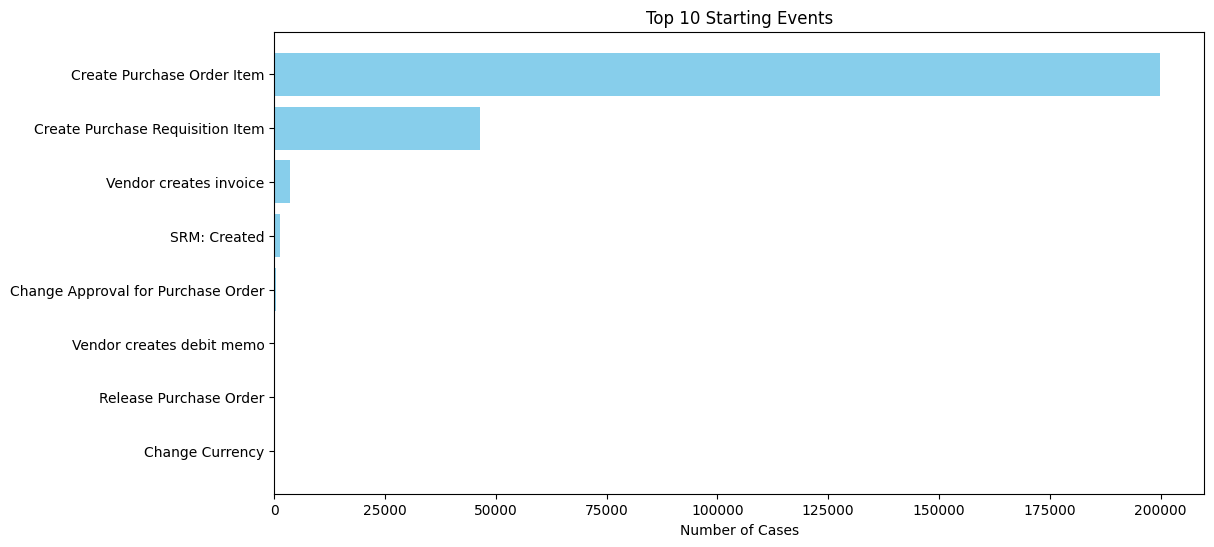

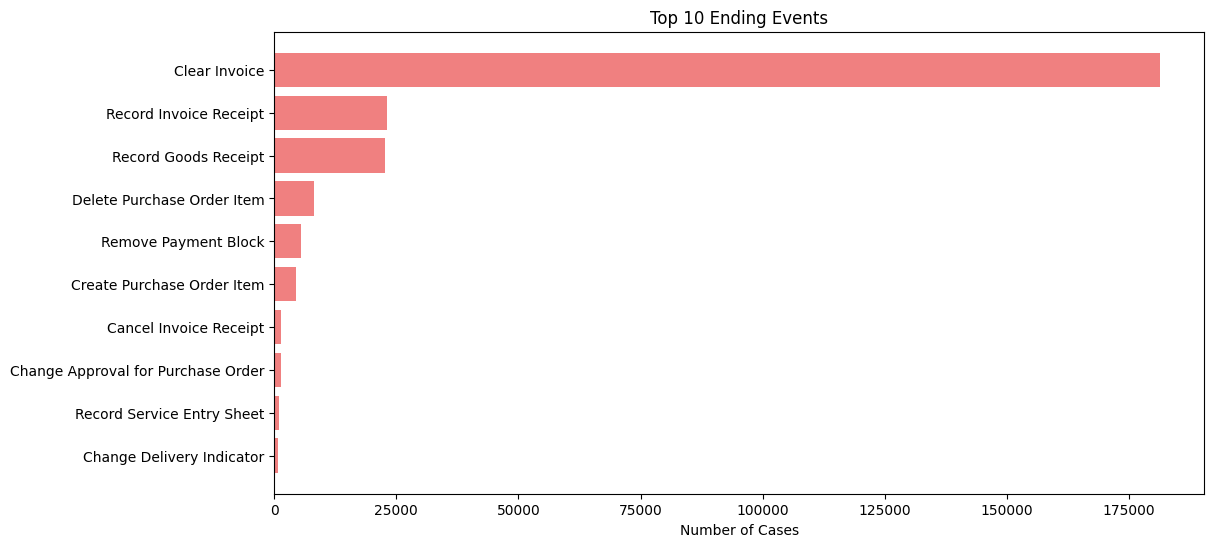

In [12]:
# Initialize dictionaries to store frequencies of starting and ending events
start_event_freq = {}
end_event_freq = {}

# Count the occurrence of each activity as starting and ending event
for trace in log:
    if len(trace) > 0:
        # Get the first and last event in the trace
        start_event = trace[0]["concept:name"]
        end_event = trace[-1]["concept:name"]

        # Count the starting events
        start_event_freq[start_event] = start_event_freq.get(start_event, 0) + 1

        # Count the ending events
        end_event_freq[end_event] = end_event_freq.get(end_event, 0) + 1

# Convert to list of tuples and sort by frequency
sorted_start_events = sorted(start_event_freq.items(), key=lambda x: x[1], reverse=True)
sorted_end_events = sorted(end_event_freq.items(), key=lambda x: x[1], reverse=True)

# Extract top 10 for visualization
top_start_events = sorted_start_events[:10]
top_end_events = sorted_end_events[:10]

# Separate the activities and counts for plotting
start_activities, start_counts = zip(*top_start_events)
end_activities, end_counts = zip(*top_end_events)

import matplotlib.pyplot as plt

# Plot for Starting Events
plt.figure(figsize=(12, 6))
plt.barh(start_activities, start_counts, color='skyblue')
plt.xlabel('Number of Cases')
plt.title('Top 10 Starting Events')
plt.gca().invert_yaxis()
plt.show()

# Plot for Ending Events
plt.figure(figsize=(12, 6))
plt.barh(end_activities, end_counts, color='lightcoral')
plt.xlabel('Number of Cases')
plt.title('Top 10 Ending Events')
plt.gca().invert_yaxis()
plt.show()


# Variant Analysis

In [13]:
import pm4py
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.variants.log import get as variants_module
from tabulate import tabulate

# Extract variants from the event log
variants = variants_module.get_variants(log)

# Count the occurrences of each variant
variant_counts = {k: len(v) for k, v in variants.items()}

# Sort variants by their frequency in descending order
sorted_variants = sorted(variant_counts.items(), key=lambda x: x[1], reverse=True)

# Limit to top 10 variants for better visualization
top_n = 6
sorted_variants = sorted_variants[:top_n]

# Total number of cases
total_cases = len(log)

# Prepare data for the table
variant_data = []
for i, (variant, count) in enumerate(sorted_variants):
    variant_str = ' -> '.join(variant)
    percentage = (count / total_cases) * 100
    variant_data.append({
        'Variant': f'Variant {i+1}',
        'Sequence': variant_str,
        'Count': count,
        'Percentage': f"{percentage:.2f}%"  # Format to two decimal places
    })

# Create and display table
variant_table = tabulate(variant_data, headers="keys", tablefmt="pretty")
print("Table of Variants, Their Counts, and Percentage of Total Cases:")
print(variant_table)


Table of Variants, Their Counts, and Percentage of Total Cases:
+-----------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+------------+
|  Variant  |                                                                          Sequence                                                                           | Count | Percentage |
+-----------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+------------+
| Variant 1 |                   Create Purchase Order Item -> Vendor creates invoice -> Record Goods Receipt -> Record Invoice Receipt -> Clear Invoice                   | 50286 |   19.98%   |
| Variant 2 |                   Create Purchase Order Item -> Record Goods Receipt -> Vendor creates invoice -> Record Invoice Receipt -> Clear Invoice             

# Pareto Principle

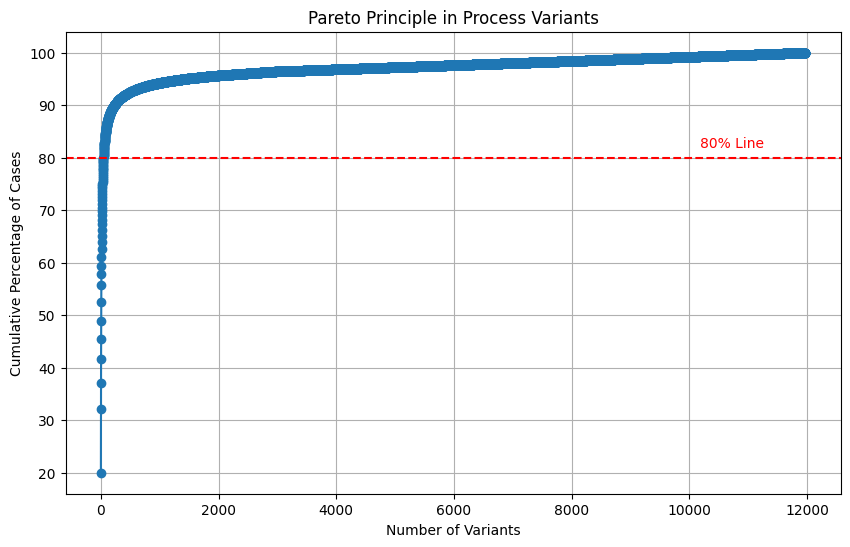

In [14]:
import pm4py
from pm4py.statistics.variants.log import get as variants_get
from matplotlib import pyplot as plt
import numpy as np

# Step 1: Extract the variant data
variant_statistics = pm4py.statistics.variants.log.get.get_variants(log)

# Step 2: Flatten the variant statistics dictionary and calculate total cases
flattened_variants = [(key, len(value)) for key, value in variant_statistics.items()]
total_cases = sum(count for _, count in flattened_variants)

# Sort variants by count in descending order
flattened_variants.sort(key=lambda x: x[1], reverse=True)

# Calculate cumulative percentage
cumulative_counts = np.cumsum([count for _, count in flattened_variants])
cumulative_percentages = (cumulative_counts / total_cases) * 100

# Step 3: Plot the cumulative percentage to show the Pareto principle
plt.figure(figsize=(10, 6))
plt.plot(cumulative_percentages, marker='o')
plt.xlabel('Number of Variants')
plt.ylabel('Cumulative Percentage of Cases')
plt.title('Pareto Principle in Process Variants')
plt.grid(True)

# Add a line to mark the 80% point
plt.axhline(y=80, color='r', linestyle='--')
plt.text(len(cumulative_percentages) * 0.85, 82, '80% Line', color='r')

# Show the plot
plt.show()



# Filtering the Log

# 1- filter the log base on the start date
#### just keep the cases with starting date from 1/1/2018
##### Runned once no need to run again

In [18]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from datetime import datetime

# Load the log

# Define the cutoff date
cutoff_date = datetime(2018, 1, 1)

# Filter the log to retain only cases starting on or after January 1, 2018
filtered_log = pm4py.objects.log.obj.EventLog()

for trace in log:
    start_timestamp = trace[0]["time:timestamp"]
    if start_timestamp.tzinfo is not None:
        start_timestamp = start_timestamp.replace(tzinfo=None)
    if start_timestamp >= cutoff_date:
        filtered_log.append(trace)

# Export the filtered log to a new XES file
xes_exporter.apply(filtered_log, 'filtered_log_2018.xes')  

# Print summary statistics for the filtered log
print(f"Total cases after filtering: {len(filtered_log)}")
print(f"Total events after filtering: {sum(len(trace) for trace in filtered_log)}")


exporting log, completed traces :: 100%|██████████| 251470/251470 [00:33<00:00, 7486.64it/s]

Total cases after filtering: 251470
Total events after filtering: 1587925


# Process Discovery for the Filtered Log

### Split the log to -With SRM and -Without SRM

In [19]:

# Initialize two sub-logs
log_with_srm = pm4py.objects.log.obj.EventLog()
log_without_srm = pm4py.objects.log.obj.EventLog()

# Iterate through each trace in the log
for trace in filtered_log:
    contains_srm = any(event["concept:name"].startswith("SRM:") for event in trace)

    if contains_srm:
        log_with_srm.append(trace)
    else:
        log_without_srm.append(trace)

# Export the sub-logs to new XES files
xes_exporter.apply(log_with_srm, 'log_with_srm.xes')
xes_exporter.apply(log_without_srm, 'log_without_srm.xes')

# Print summary statistics for the sub-logs
print(f"Total cases with SRM: {len(log_with_srm)}")
print(f"Total events with SRM: {sum(len(trace) for trace in log_with_srm)}")

print(f"Total cases without SRM: {len(log_without_srm)}")
print(f"Total events without SRM: {sum(len(trace) for trace in log_without_srm)}")


exporting log, completed traces :: 100%|██████████| 250045/250045 [00:33<00:00, 7519.06it/s]


Total cases with SRM: 1425
Total events with SRM: 21593
Total cases without SRM: 250045
Total events without SRM: 1566332


# filter the log based on the wanted flows by the Challenge

In [ ]:
! pip install pm4py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=6785f2f85639b606aaf1aca1eac19d9e1441ca521bcb6ddf8337f4c0dbb2186a
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [20]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer

log_without_srm = xes_importer.apply('./log_without_srm.xes')

parsing log, completed traces :: 100%|██████████| 250045/250045 [00:51<00:00, 4851.12it/s]


## filtering log for for 3-way match invoice after GR


In [21]:
# Initialize lists for the two logs
log_with_gr_and_goods_receipt = []

# Iterate through each case in the log
for case in log_without_srm:

    attributes = case.attributes

    # Check if both flags are True
    if attributes['GR-Based Inv. Verif.'] and attributes['Goods Receipt']:
        log_with_gr_and_goods_receipt.append(case)


# Print the lengths of the two logs
print("Number of cases in log_with_gr_and_goods_receipt:", len(log_with_gr_and_goods_receipt))


Number of cases in log_with_gr_and_goods_receipt: 14531


In [24]:
from pm4py.objects.log.obj import EventLog

# Create EventLog objects from the lists
log_with_gr_and_goods_receipt_obj = EventLog()
for case in log_with_gr_and_goods_receipt:
    log_with_gr_and_goods_receipt_obj.append(case)


# Export log with 3-way matching, invoice after goods receipt
xes_exporter.apply(log_with_gr_and_goods_receipt_obj, './models/log_3_way_I_after_gr.xes')



exporting log, completed traces :: 100%|██████████| 14531/14531 [00:05<00:00, 2876.70it/s]



### filter the log for Model 3-way match (invoice before Good Receipt)

In [25]:
# Initialize lists for filtered logs
log_requires_goods_receipt = []

# Iterate through each case in the log
for case in log_without_srm:
    attributes = case.attributes
    # Check if the case matches the criteria
    if attributes['GR-Based Inv. Verif.'] == False and attributes['Goods Receipt'] == True:
        log_requires_goods_receipt.append(case)

# Convert the list back to an event log object
log_requires_goods_receipt = pm4py.objects.log.obj.EventLog(log_requires_goods_receipt)

# Print the number of cases that match the criteria
print("Number of cases that require goods receipt but not GR-based invoicing:", len(log_requires_goods_receipt))


Number of cases that require goods receipt but not GR-based invoicing: 234485


In [26]:
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
xes_exporter.apply(log_requires_goods_receipt,'./models/log_with_3_way_I_before_gr.xes')

exporting log, completed traces :: 100%|██████████| 234485/234485 [00:28<00:00, 8310.46it/s] 


parsing log, completed traces ::   0%|          | 0/234485 [00:00<?, ?it/s]

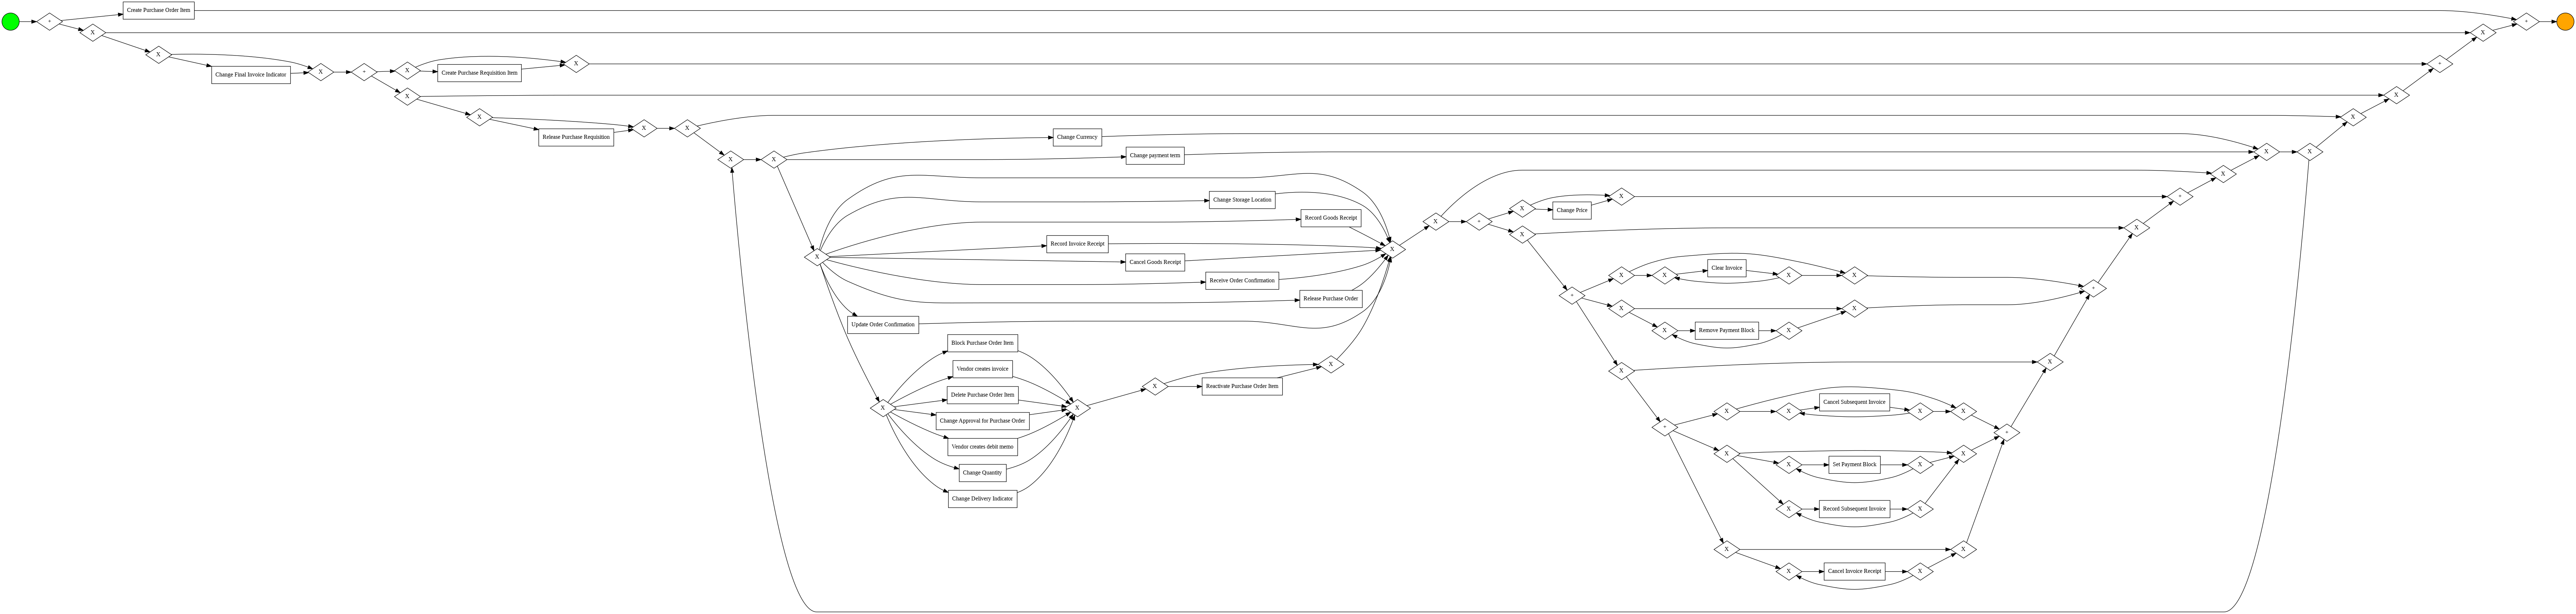

In [ ]:
# import pm4py
# from pm4py.objects.log.importer.xes import importer as xes_importer
# import pandas as pd

# # Load the event log
# log = xes_importer.apply('/content/drive/MyDrive/log_with_3_way_I_before_gr.xes')

# process_tree = pm4py.discover_process_tree_inductive(log)
# bpmn_model = pm4py.convert_to_bpmn(process_tree)
# pm4py.view_bpmn(bpmn_model)


# 2-Way Match

In [27]:
# Initialize lists for the two logs
log_with_2_way_matching = []

# Iterate through each case in the log
for case in log_without_srm:
    attributes = case.attributes

    # Check if both flags are False
    if not attributes['GR-Based Inv. Verif.'] and not attributes['Goods Receipt']:
        log_with_2_way_matching.append(case)


# Convert the list back to an event log object
log_with_2_way_matching = pm4py.objects.log.obj.EventLog(log_with_2_way_matching)

# Print the lengths of the two logs
print("Number of cases with 2-way matching:", len(log_with_2_way_matching))

# Save the filtered logs to separate files
# Replace 'log_with_2_way_matching.xes' and 'log_without_2_way_matching.xes' with desired file paths
xes_exporter.apply(log_with_2_way_matching, './models/log_with_2_way_matching.xes')

Number of cases with 2-way matching: 1029


exporting log, completed traces :: 100%|██████████| 1029/1029 [00:00<00:00, 7913.19it/s]


# Consignment

In [28]:
# Initialize an empty list to store cases matching the criteria
log_consignment = []

# Iterate through each case in the log
for case in log_without_srm:
    attributes = case.attributes

    # Check if the GR indicator is true, GR IV flag is false, and item type is consignment
    if attributes['Goods Receipt'] and not attributes['GR-Based Inv. Verif.'] and attributes['Item Type'] == 'Consignment':
        log_consignment.append(case)

# Convert the list back to an event log object
log_consignment = pm4py.objects.log.obj.EventLog(log_consignment)


# Print the number of cases matching the criteria
print("Number of cases matching the criteria:", len(log_consignment))

# Save the filtered log to a separate file for further analysis
# Replace '/path/to/log_consignment.xes' with the desired file path
xes_exporter.apply(log_consignment, './models/log_consignment.xes')


Number of cases matching the criteria: 14497


exporting log, completed traces :: 100%|██████████| 14497/14497 [00:01<00:00, 12847.77it/s]


# BPMN WITH PM4PY


In [ ]:
! pip install pm4py

## importing the log